# Model Calibration

## Imports and Setup

In [1]:
import os 
os.chdir('/home/itingzon.unicef/giga')
from utils import config_utils
from utils import calib_utils
from utils import post_utils
from utils import eval_utils
from utils import model_utils

import pandas as pd
import numpy as np
import geopandas as gpd

pd.set_option('mode.chained_assignment', None)
%load_ext autoreload
%autoreload 2

## Load Configuration

In [2]:
iso_code = "SEN"
config_file = os.path.join(os.getcwd(), "configs/best_models.yaml")
config = config_utils.load_config(config_file)

## Model Calibration

In [7]:
results = calib_utils.compare_calibrators(iso_code, config, n_bins=10)
results = pd.DataFrame(results).T.apply(lambda x: round(x, 5))
results

,val_ace,val_ece,val_mce,val_nll,val_briers,val_auprc,test_ace,test_ece,test_mce,test_nll,test_briers,test_auprc
Uncalibrated (baseline),0.13226,0.07656,0.25793,0.11495,0.02221,0.99684,0.16096,0.08406,0.30958,0.12129,0.02276,0.99282
IsotonicRegression,0.00000,0.00000,0.00000,0.04008,0.01173,0.99662,0.27402,0.00702,0.77200,0.11205,0.01214,0.99055
TemperatureScaling,0.07131,0.00541,0.25066,0.05031,0.01335,0.99684,0.18526,0.00988,0.75398,0.05545,0.01189,0.99282
LogisticCalibration,0.13030,0.00747,0.56534,0.05017,0.01339,0.99684,0.19448,0.00844,0.73441,0.05420,0.01168,0.99282
BetaCalibration,0.13077,0.00657,0.56305,0.05005,0.01335,0.99684,0.19835,0.00836,0.73456,0.05357,0.01173,0.99282


In [ ]:
results.iloc[0] - results

## Load Model Calibrator

In [22]:
calibrator_name = "LogisticCalibration"
calibrator = calib_utils.load_calibrator(iso_code, config, calibrator_name)
calibrator

LogisticCalibration(_default_independent_probabilities=False,
                    _device=device(type='cpu'),
                    _sites=OrderedDict([('weights',
                                         {'constraint': Real(),
                                          'init': {'mean': tensor([1.], dtype=torch.float64),
                                                   'scale': tensor([1.], dtype=torch.float64)},
                                          'prior': Independent(Normal(loc: tensor([1.], dtype=torch.float64), scale: tensor([10.], dtype=torch.float64)), 1),
                                          'values': arr...
                                          'prior': Independent(Normal(loc: tensor([0.], dtype=torch.float64), scale: tensor([10.], dtype=torch.float64)), 1),
                                          'values': array([-0.14695692])})]),
                    detection=False, independent_probabilities=False,
                    mask_negative=False, mcmc_chains=1, mcmc_model=None,
                    mcmc_steps=250, mcmc_warmup=100, method='mle',
                    momentum_epochs=1000, num_classes=2, num_features=1,
                    vi_epochs=1000, vi_model=None)

## Plot Results

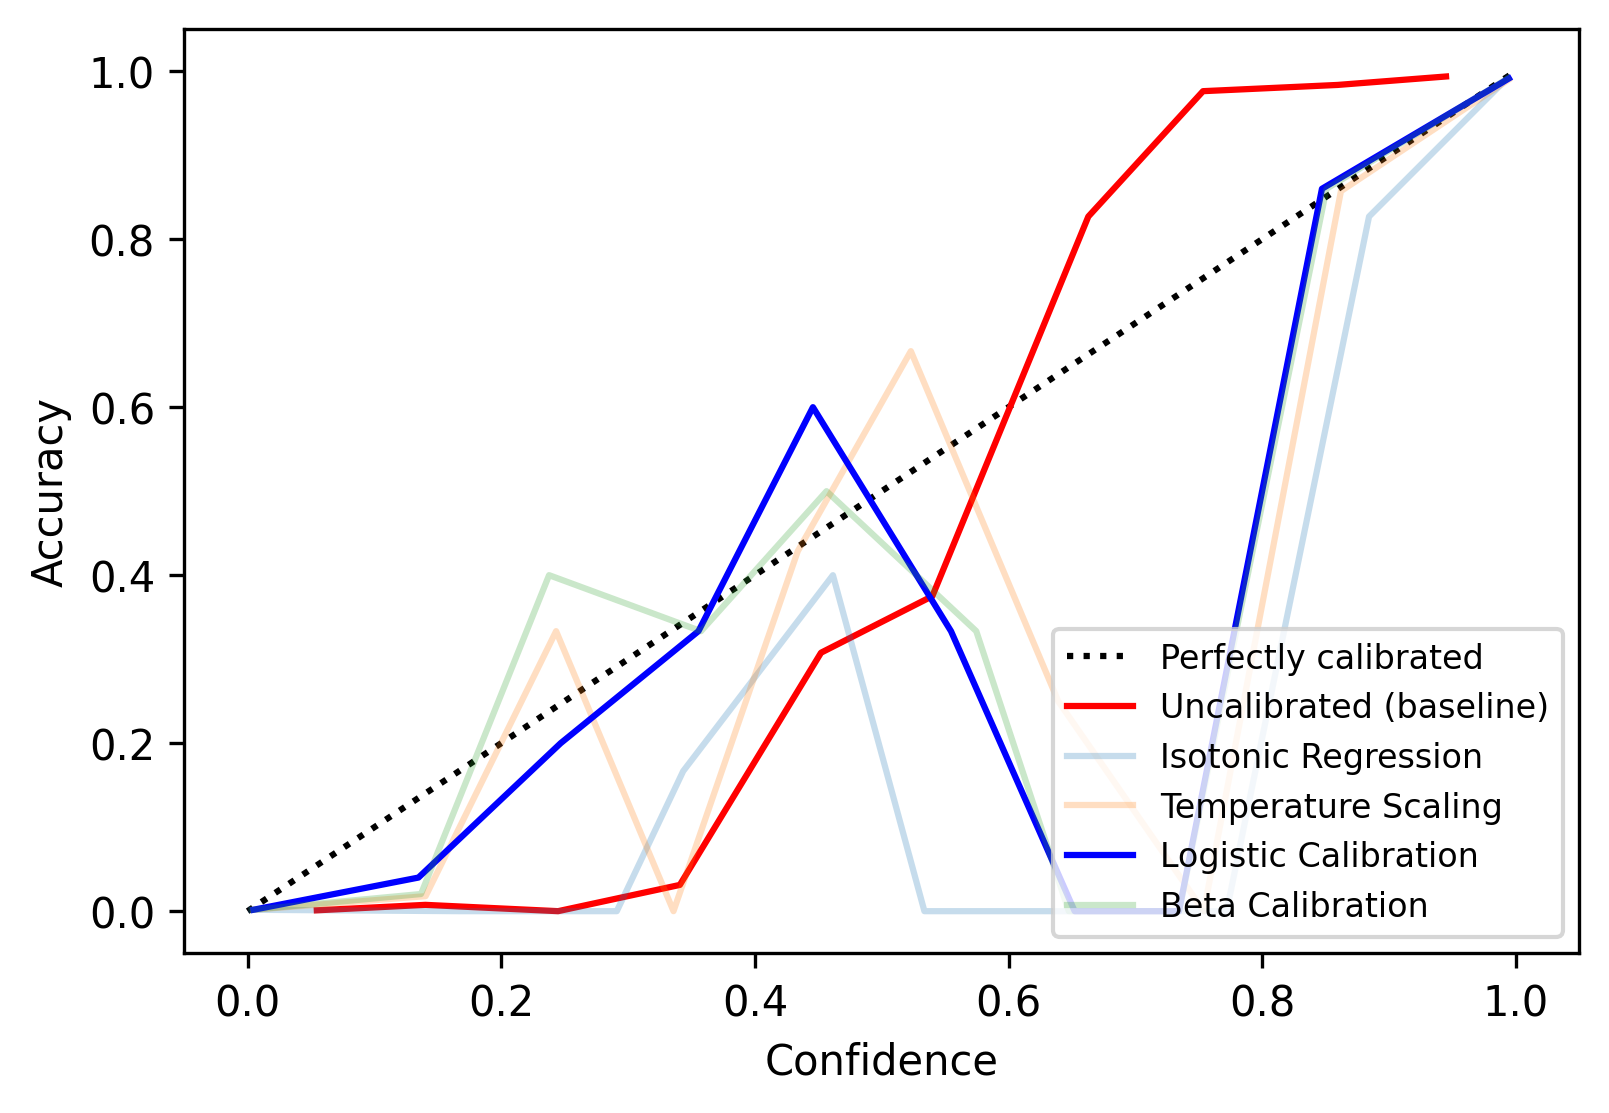

In [23]:
calib_utils.calibration_curves(iso_code, config, highlight=calibrator_name, n_bins=10)

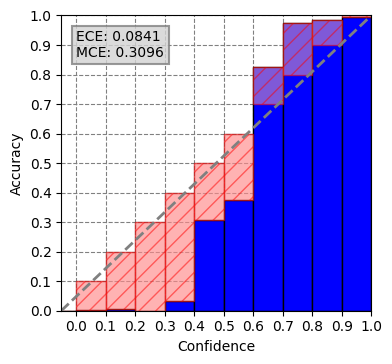

In [24]:
output = calib_utils.get_calibrator_outputs(iso_code, config, calibrator_name, phase="test")
calib_utils.reliability_diagram(output["y_probs"], output["y_true"], n_bins=10)

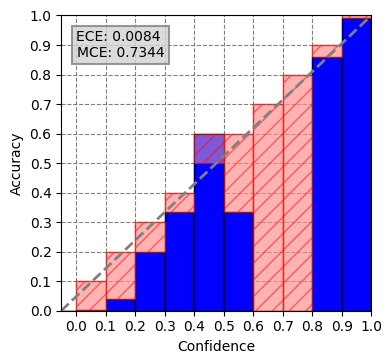

In [25]:
calib_utils.reliability_diagram(output["y_probs_cal"], output["y_true"], n_bins=10)